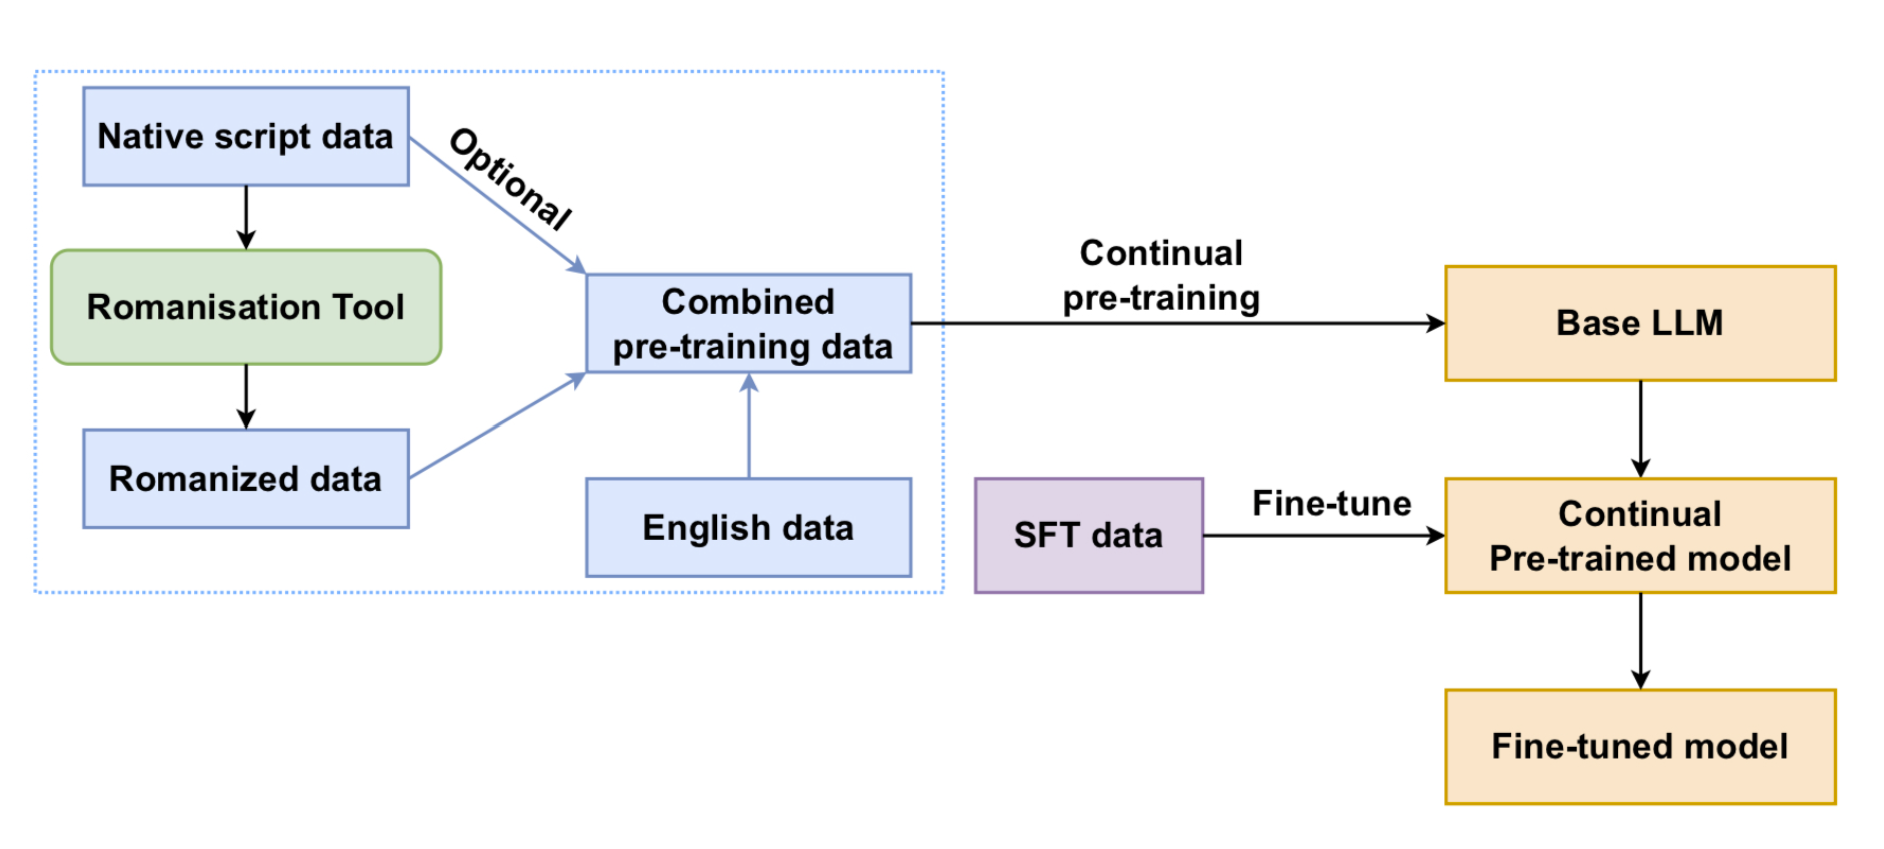

**Strength:**

The proposal provides a comprehensive overview of related work in using LLMs for multilingual translation via Romanization. The proposed timeline and methodology are feasible, with clear objectives and tasks outlined for each phase of the project.

**Weakness & Suggestions:**

You might consider using LoRA to successfully run LLMs like LLaMA2-7B model on your dataset.

Find inportant links: https://docs.google.com/document/d/11Q03Pk0WQB0fLmQJYMzlJ4z9ZdItkqt0iGExgcC4YVo/edit?usp=sharing

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/Shared drives/USC_CSCI544-Applied NLP/Project_544') # where the files for this project are


Mounted at /content/drive


In [ ]:
# !pip install indic_transliteration

In [4]:
!pip install ai4bharat-transliteration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 47.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 33.6 MB/s eta 0:00:00
     ━

In [5]:
from ai4bharat.transliteration import XlitEngine # Used in paper

In [ ]:
# from indic_transliteration import sanscript

# from indic_transliteration.sanscript import transliterate

import csv

In [ ]:
# from itertools import product


In [ ]:
# from transformers import BartTokenizer, BartForConditionalGeneration
# from sklearn.model_selection import train_test_split
# import torch
# from torch.utils.data import DataLoader, TensorDataset
# from transformers import AdamW




# **Step 1: Data Preparation**

In [ ]:
# # Example Devanagari text
# devanagari_text = "यह एक उदाहरण है"

# # Romanization using IndicXlit
# romanized_text = transliterate(devanagari_text, sanscript.DEVANAGARI, sanscript.ITRANS)

# print("Romanized Text:", romanized_text.lower())

In [8]:
file_path = "data/hindi_data/Dataset_English_Hindi.csv"

# Lists to store Hindi and English sentences
hindi_sentences = []
english_sentences = []

# Read data from the CSV file
with open(file_path, newline='', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        hindi_sentences.append(row['Hindi'])
        english_sentences.append(row['English'])



['बचाओ!', 'उछलो.', 'कूदो.', 'छलांग.', 'नमस्ते।']
['Help!', 'Jump.', 'Jump.', 'Jump.', 'Hello!']


In [17]:
print(hindi_sentences[:10])
print(english_sentences[:10])

len(hindi_sentences)

['बचाओ!', 'उछलो.', 'कूदो.', 'छलांग.', 'नमस्ते।', 'नमस्कार।', 'वाह-वाह!', 'चियर्स!', 'समझे कि नहीं?', 'मैं ठीक हूँ।']
['Help!', 'Jump.', 'Jump.', 'Jump.', 'Hello!', 'Hello!', 'Cheers!', 'Cheers!', 'Got it?', "I'm OK."]


130476

In [19]:
def average_words_per_sentence(sentence_list):
    total_words = 0
    total_sentences = len(sentence_list)

    for sentence in sentence_list:
        words = sentence.split()
        total_words += len(words)

    if total_sentences == 0:
        return 0

    average_words = total_words / total_sentences
    return average_words

print(average_words_per_sentence(hindi_sentences))

17.461157607529355


In [ ]:
# romanized_sentences = []
# for sentence in hindi_sentences:
#         romanized_text = transliterate(sentence, sanscript.DEVANAGARI, sanscript.ITRANS)
#         romanized_sentences.append(romanized_text.lower())

# print(romanized_sentences[:5])


In [13]:
# intializing the indic-en multilingual model and dictionaries (if rerank option is True)
e = XlitEngine( beam_width=10, src_script_type = "indic")


MB100% (119.0 of 119.0) |################| Elapsed Time: 0:00:00 Time:  0:00:00


Succefully Downloaded to: /usr/local/lib/python3.10/dist-packages/ai4bharat/transliteration/transformer/models/indic2en/v1.0/model.zip
Models downloaded to: /usr/local/lib/python3.10/dist-packages/ai4bharat/transliteration/transformer/models/indic2en/v1.0
NOTE: When uninstalling this library, REMEMBER to delete the models manually


MB100% (2.0 of 2.0) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


Succefully Downloaded to: /usr/local/lib/python3.10/dist-packages/ai4bharat/transliteration/transformer/models/indic2en/v1.0/dicts.zip
Initializing Multilingual model for transliteration


Loading dicts into RAM: 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]


In [ ]:
# # Example Devanagari text
# devanagari_text = "यह एक उदाहरण है"
# out = e.translit_sentence(devanagari_text, 'hi')
# print(out)

In [15]:
# New DataSet
romanization_file = "data/hindi_data/new_romanized_hindi_english_paper.csv"

with open(romanization_file, 'w', newline='', encoding = 'utf-8') as file:
  writer = csv.writer(file)
  i = 0
  for sentence in hindi_sentences:
    sen = e.translit_sentence(sentence, 'hi')
    writer.writerow([hindi_sentences[i], sen, english_sentences[i]])
    i+=1
    if(i%50 == 0):
        print(f"Doing sentence {i}")

Doing sentence 50
Doing sentence 100
Doing sentence 150
Doing sentence 200
Doing sentence 250
Doing sentence 300
Doing sentence 350
Doing sentence 400
Doing sentence 450
Doing sentence 500
Doing sentence 550
Doing sentence 600
Doing sentence 650
Doing sentence 700
Doing sentence 750
Doing sentence 800
Doing sentence 850
Doing sentence 900
Doing sentence 950
Doing sentence 1000
Doing sentence 1050
Doing sentence 1100
Doing sentence 1150
Doing sentence 1200
Doing sentence 1250
Doing sentence 1300
Doing sentence 1350
Doing sentence 1400
Doing sentence 1450
Doing sentence 1500
Doing sentence 1550
Doing sentence 1600
Doing sentence 1650
Doing sentence 1700
Doing sentence 1750
Doing sentence 1800
Doing sentence 1850
Doing sentence 1900
Doing sentence 1950
Doing sentence 2000
Doing sentence 2050
Doing sentence 2100
Doing sentence 2150
Doing sentence 2200
Doing sentence 2250
Doing sentence 2300
Doing sentence 2350
Doing sentence 2400
Doing sentence 2450
Doing sentence 2500
Doing sentence 2550


KeyboardInterrupt: 

In [ ]:
# file_path = "data/hindi_data/hindi_sentiment_analysis.csv"

# # Lists to store Hindi and sentiment of sentences
# hindi_sentences = []
# sentiment = []

# # Read data from the CSV file
# with open(file_path, newline='', encoding='utf-8') as csvfile:
#     csv_reader = csv.reader(csvfile)
#     for row in csv_reader:
#       # print(row)
#       hindi_sentences.append(row[0])
#       sentiment.append(row[1])
#       # break;

# print(hindi_sentences[:5])
# print(sentiment[:5])

In [ ]:
# # New DataSet
# romanization_file = "data/hindi_data/romanized_hindi_sentiment_paper.csv"

# with open(romanization_file, 'w', newline='', encoding = 'utf-8') as file:
#   writer = csv.writer(file)
#   i = 0
#   for sentence in hindi_sentences:
#     sen = e.translit_sentence(sentence, 'hi')
#     writer.writerow([hindi_sentences[i], sen, sentiment[i]])
#     i+=1
#     if(i%500 == 0):
#         print(f"Doing sentence {i}")

# **Step 2: Model Training and Evaluation**